<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Данные" data-toc-modified-id="Данные-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Данные</a></span><ul class="toc-item"><li><span><a href="#Подключение-к-базе-данных.-Загрузка-датасета" data-toc-modified-id="Подключение-к-базе-данных.-Загрузка-датасета-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Подключение к базе данных. Загрузка датасета</a></span></li><li><span><a href="#Обзор-датасета" data-toc-modified-id="Обзор-датасета-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Обзор датасета</a></span></li></ul></li><li><span><a href="#Выгрузка-данных" data-toc-modified-id="Выгрузка-данных-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Выгрузка данных</a></span></li><li><span><a href="#Результат-работы" data-toc-modified-id="Результат-работы-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Результат работы</a></span></li></ul></div>

# Анализ взаимодействия пользователей с карточками Яндекс.Дзен

## Описание проекта

1. Бизнес-задача: анализ взаимодействия пользователей с карточками Яндекс.Дзен;
2. Предполагаемая чатсота пользования дашбордом: не реже, чем раз в неделю;
3. Оновные пользователи дашборда: менеджеры по анализу контента;
4. Состав данных для дашборда:
   - История событий по темам карточек (два графика - абсолютные числа и процентное соотношение);
   - Разбивка событий по темам источников;
   - Таблица соответствия тем источников темам карточек;
5. По каким параметрам данные должны группироваться:
   - Дата и время;
   - Тема карточки;
   - Тема источника;
   - Возрастная группа;
   - Характер данных:
6. История событий по темам карточек — абсолютные величины с разбивкой по минутам;
7. Разбивка событий по темам источников — относительные величины (% событий);
8. Соответствия тем источников темам карточек - абсолютные величины;
9. Важность: все графики имеют равную важность;
10. Источники данных для дашборда: дата-инженеры обещали подготовить для вас агрегирующую таблицу dash_visits. Вот её структура:
    - record_id — первичный ключ,
    - item_topic — тема карточки,
    - source_topic — тема источника,
    - age_segment — возрастной сегмент,
    - dt — дата и время,
    - visits — количество событий.
11. Таблица хранится в специально подготовленной для вас базе данных zen;
12. Частота обновления данных: один раз в сутки, в полночь по UTC; 

## Данные

 ### Подключение к базе данных. Загрузка датасета

In [ ]:
pip install psycopg2-binary 

In [1]:
# импортируем библиотеки
import pandas as pd
from sqlalchemy import create_engine
import matplotlib.pyplot as plt  # Библиотека для визуализации


In [2]:
# подготовка данных для подключения к базе данных
db_config = {'user': 'praktikum_student', # имя пользователя
            'pwd': 'Sdf4$2;d-d30pp', # пароль
            'host': 'rc1b-wcoijxj3yxfsf3fs.mdb.yandexcloud.net',
            'port': 6432, # порт подключения
            'db': 'data-analyst-zen-project-db'} # название базы данных

connection_string = 'postgresql://{}:{}@{}:{}/{}'.format(db_config['user'],
                                                db_config['pwd'],
                                                db_config['host'],
                                                db_config['port'],
                                                db_config['db'])

engine = create_engine(connection_string)

In [3]:
# SQL запрос к базе данных
query = '''
            SELECT * 
            FROM dash_visits
        '''

In [4]:
# выгрузка данных из базы
data  =  pd.io.sql.read_sql(query, con = engine)

### Обзор датасета

In [5]:
 # Функция первичного обзора данных.

def meet_dataset (dataset):
    #print('Первые 5 строк датасета')
    #print(dataset.head())
    #print('\n','\n')
    
    print('Общая информация о датасете')
    display(dataset.info())
    print()
    
    print('Общие статистические данные')
    display(dataset.describe())
    print('\n')
          
    print('Общие гистограммы для  столбцов датасета')
    dataset.hist (figsize=(15,10))
    plt.show()  
    print('\n','\n')
        
    
    print ('Количество дубликатов -', dataset.duplicated().sum()) 
    print ('Доля дубликатов в датасете, %:', round( 100*dataset.duplicated().sum()/dataset.shape[0], 2))
    print()
    
    #print ('Количество пропусков -', dataset.isna().sum(),'\n','\n') 
       
    #количество пропусков по столбцам
    data_gap= pd.DataFrame(dataset.isna().sum()).reset_index(drop=False)
    # обозначение имени столбца
    data_gap.columns=['Столбец','Количество пропусков']
    # относительное количество пропусков по столбцам в %
    data_gap['Количество пропусков в %'] = round(data_gap['Количество пропусков']/ len(dataset) * 100, 2)
    #display (data_gap.style.background_gradient('coolwarm'))
    display (data_gap.style.background_gradient())

    print() 
    
    #Приведение названий столбцов к нижнему регистру
    #dataset.columns = [x.lower().replace(' ', '_') for x in dataset.columns.values]
    
    print ('Датасет:','\n')
    
    return display(dataset.head())

Общая информация о датасете
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30745 entries, 0 to 30744
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   record_id     30745 non-null  int64         
 1   item_topic    30745 non-null  object        
 2   source_topic  30745 non-null  object        
 3   age_segment   30745 non-null  object        
 4   dt            30745 non-null  datetime64[ns]
 5   visits        30745 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(3)
memory usage: 1.4+ MB


None


Общие статистические данные


,record_id,visits
count,3.074500e+04,30745.000000
mean,1.055969e+06,10.089673
std,8.875461e+03,19.727601
min,1.040597e+06,1.000000
25%,1.048283e+06,1.000000
50%,1.055969e+06,3.000000
75%,1.063655e+06,10.000000
max,1.071341e+06,371.000000




Общие гистограммы для  столбцов датасета


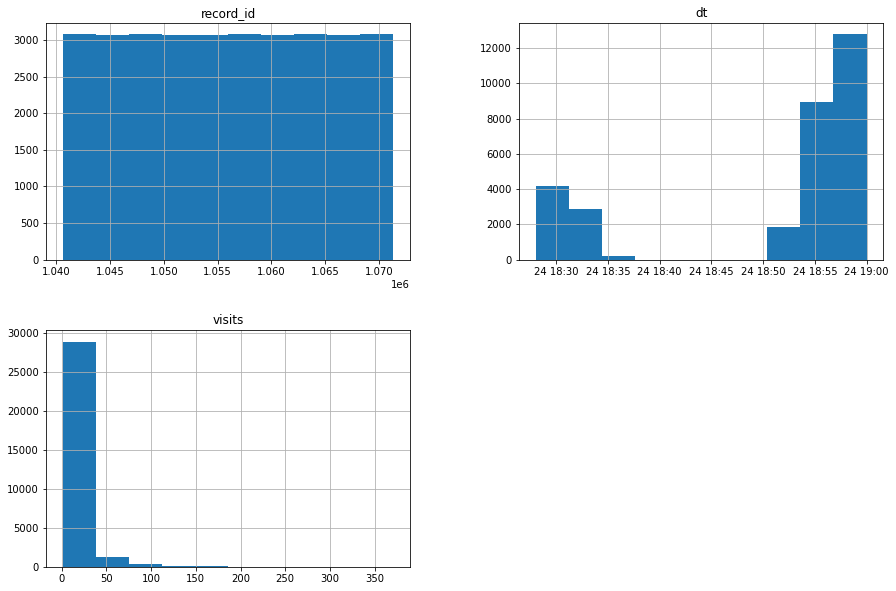


 

Количество дубликатов - 0
Доля дубликатов в датасете, %: 0.0



,Столбец,Количество пропусков,Количество пропусков в %
0,record_id,0,0.000000
1,item_topic,0,0.000000
2,source_topic,0,0.000000
3,age_segment,0,0.000000
4,dt,0,0.000000
5,visits,0,0.000000



Датасет: 



,record_id,item_topic,source_topic,age_segment,dt,visits
0,1040597,Деньги,Авто,18-25,2019-09-24 18:32:00,3
1,1040598,Деньги,Авто,18-25,2019-09-24 18:35:00,1
2,1040599,Деньги,Авто,18-25,2019-09-24 18:54:00,4
3,1040600,Деньги,Авто,18-25,2019-09-24 18:55:00,17
4,1040601,Деньги,Авто,18-25,2019-09-24 18:56:00,27


In [6]:
meet_dataset(data)

## Выгрузка данных

In [7]:
data.to_csv('dash_visits.csv', index=False)

## Результат работы

- Дашборд сформирован на основании ТЗ и макета. Дашборд доступен по ссылке <https://public.tableau.com/app/profile/maxim.rakovets/viz/Project_12_16706059867540/Dashboard1?publish=yes>.
- Настоящая презентация в Google Docs доступна по ссылке  <https://docs.google.com/presentation/d/15A4ybBwH_0mMt1j9Ma8Cp_Hy19SGgZkjt_c6X7LBSn8/edit#slide=id.gc6f73a04f_0_0>.
- Настоящая презентация в PDF доступна по ссылке  <https://drive.google.com/file/d/1JFjWGmFlxOmeQ3l-KKem2Eb5J7ocYdVX/view?usp=sharing> 